# Convolutional Neural Network (CNN) for Car Damage Image Classification.

In [1]:
# importing libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# DATA  PREPROCESSING

# LABEL MAPPING

In [2]:
label_mapping = {
    1: 'crack',
    2: 'scratch',
    3: 'tire flat',
    4: 'dent',
    5: 'glass shatter',
    6: 'lamp broken'
}
class_names = list(label_mapping.values())


# LOADING THE TRAIN FILE

In [3]:

# Load the CSV file
df = pd.read_csv('train/train/train.csv')

# Converting label column to int
df['label'] = df['label'].astype(int)

# Loading images from folder
def load_images(df, img_dir):
    images, labels = [], []
    for _, row in df.iterrows():
        img_path = os.path.join(img_dir, row['filename']) 
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        images.append(img)
        labels.append(row['label'] - 1)  
    return np.array(images), np.array(labels)

# Applying the function
x, y = load_images(df, 'train/train/images')

# Spliting into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [4]:
print("x_train shape is:", x_train.shape)
print("x_test shape is:", x_test.shape)
print("y_train shape is:", y_train.shape)
print("y_test shape is:", y_test.shape)


x_train shape is: (5760, 32, 32, 3)
x_test shape is: (1440, 32, 32, 3)
y_train shape is: (5760,)
y_test shape is: (1440,)


In [5]:
x_train[1].shape


(32, 32, 3)

In [6]:
x_train


array([[[[109, 124, 116],
         [111, 122, 114],
         [119, 130, 122],
         ...,
         [166, 152, 135],
         [154, 140, 126],
         [115, 108, 101]],

        [[129, 140, 132],
         [114, 125, 117],
         [112, 123, 115],
         ...,
         [163, 144, 129],
         [170, 162, 148],
         [110,  98,  94]],

        [[128, 141, 127],
         [139, 137, 126],
         [136, 145, 132],
         ...,
         [132, 132, 117],
         [142, 134, 119],
         [ 96,  86,  86]],

        ...,

        [[ 40,  38,  27],
         [ 46,  50,  45],
         [ 17,  15,  14],
         ...,
         [ 69,  67,  59],
         [113, 102,  89],
         [111, 105,  94]],

        [[ 64,  66,  57],
         [ 33,  34,  30],
         [ 31,  35,  29],
         ...,
         [120, 125, 112],
         [ 89,  80,  70],
         [130, 120, 107]],

        [[ 27,  32,  30],
         [ 28,  33,  28],
         [ 50,  53,  43],
         ...,
         [118, 126, 109],
        

In [7]:
y_train


array([1, 1, 4, ..., 3, 4, 4])

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
x_train

array([[[[0.42745098, 0.48627451, 0.45490196],
         [0.43529412, 0.47843137, 0.44705882],
         [0.46666667, 0.50980392, 0.47843137],
         ...,
         [0.65098039, 0.59607843, 0.52941176],
         [0.60392157, 0.54901961, 0.49411765],
         [0.45098039, 0.42352941, 0.39607843]],

        [[0.50588235, 0.54901961, 0.51764706],
         [0.44705882, 0.49019608, 0.45882353],
         [0.43921569, 0.48235294, 0.45098039],
         ...,
         [0.63921569, 0.56470588, 0.50588235],
         [0.66666667, 0.63529412, 0.58039216],
         [0.43137255, 0.38431373, 0.36862745]],

        [[0.50196078, 0.55294118, 0.49803922],
         [0.54509804, 0.5372549 , 0.49411765],
         [0.53333333, 0.56862745, 0.51764706],
         ...,
         [0.51764706, 0.51764706, 0.45882353],
         [0.55686275, 0.5254902 , 0.46666667],
         [0.37647059, 0.3372549 , 0.3372549 ]],

        ...,

        [[0.15686275, 0.14901961, 0.10588235],
         [0.18039216, 0.19607843, 0.17647059]

In [10]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    shear_range=0.10,
    zoom_range=0.10
)


In [11]:
train_datagen.fit(x_train)

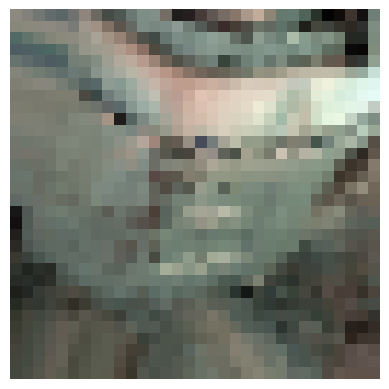

In [12]:
new_image = train_datagen.random_transform(x_train[0])
import matplotlib.pyplot as plt
plt.imshow(new_image)
plt.gca().axis("off")
plt.show()


# Defining and Training a CNN Model for Image Classification and visulization



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)        

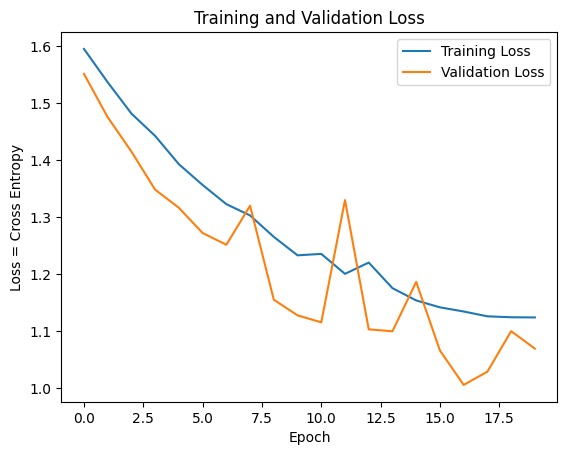

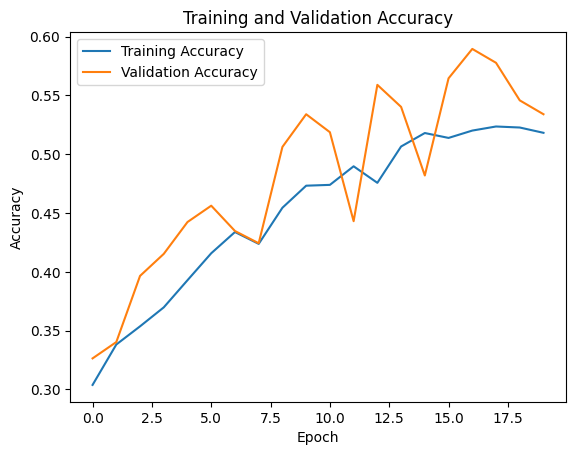

45/45 [==============================] - 0s 7ms/step
               precision    recall  f1-score   support

        crack       0.00      0.00      0.00        34
      scratch       0.67      0.33      0.44       470
    tire flat       0.89      0.72      0.79       107
         dent       0.43      0.48      0.46       416
glass shatter       0.61      0.87      0.72       237
  lamp broken       0.40      0.73      0.52       176

     accuracy                           0.53      1440
    macro avg       0.50      0.52      0.49      1440
 weighted avg       0.56      0.53      0.52      1440



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 2000x3000 with 0 Axes>

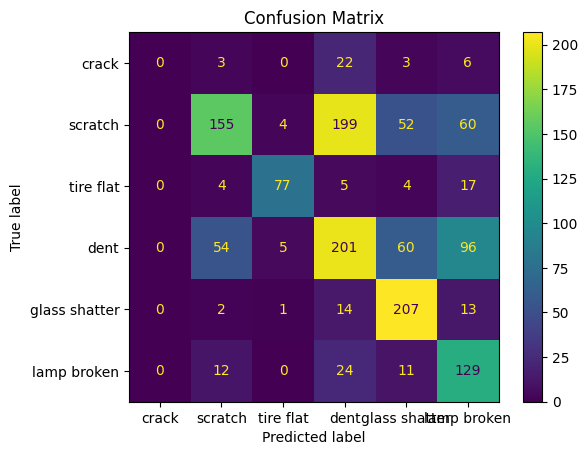

In [13]:
# Define the model
model = Sequential()
model.add(Input(shape=(32, 32, 3))) 
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))  
model.summary()

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model using train and test data
history = model.fit(
    train_datagen.flow(x_train, to_categorical(y_train, num_classes=6), batch_size=32),
    epochs=20, 
    validation_data=(x_test, to_categorical(y_test, num_classes=6))
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss = Cross Entropy')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict on test data and print classification report
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(classification_report(y_test, y_pred, target_names=class_names))

plt.figure(dpi=200, figsize=(10, 15))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()


#  Hyperparameter Tuning

In [14]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [15]:
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:

history = model.fit(
    train_datagen.flow(x_train, to_categorical(y_train), batch_size=128),
    epochs=20,
    validation_data=(x_test, to_categorical(y_test))
)


Epoch 1/20
45/45 [==============================] - 6s 122ms/step - loss: 1.6236 - accuracy: 0.3042 - val_loss: 1.5638 - val_accuracy: 0.3264
Epoch 2/20
45/45 [==============================] - 5s 117ms/step - loss: 1.5691 - accuracy: 0.3273 - val_loss: 1.5442 - val_accuracy: 0.3264
Epoch 3/20
45/45 [==============================] - 5s 117ms/step - loss: 1.5530 - accuracy: 0.3328 - val_loss: 1.5214 - val_accuracy: 0.3403
Epoch 4/20
45/45 [==============================] - 6s 127ms/step - loss: 1.5248 - accuracy: 0.3365 - val_loss: 1.4762 - val_accuracy: 0.3583
Epoch 5/20
45/45 [==============================] - 5s 119ms/step - loss: 1.4878 - accuracy: 0.3620 - val_loss: 1.4241 - val_accuracy: 0.4000
Epoch 6/20
45/45 [==============================] - 6s 124ms/step - loss: 1.4634 - accuracy: 0.3630 - val_loss: 1.4240 - val_accuracy: 0.3951
Epoch 7/20
45/45 [==============================] - 5s 118ms/step - loss: 1.4329 - accuracy: 0.3858 - val_loss: 1.3783 - val_accuracy: 0.4187
Epoch 

In [17]:

history = model.fit(
    train_datagen.flow(x_train, to_categorical(y_train), batch_size=32),
    epochs=20,
    validation_data=(x_test, to_categorical(y_test))
)


Epoch 1/20
180/180 [==============================] - 6s 32ms/step - loss: 1.2971 - accuracy: 0.4394 - val_loss: 1.2283 - val_accuracy: 0.4646
Epoch 2/20
180/180 [==============================] - 6s 31ms/step - loss: 1.2702 - accuracy: 0.4568 - val_loss: 1.1640 - val_accuracy: 0.4972
Epoch 3/20
180/180 [==============================] - 6s 31ms/step - loss: 1.2426 - accuracy: 0.4724 - val_loss: 1.1200 - val_accuracy: 0.5222
Epoch 4/20
180/180 [==============================] - 6s 32ms/step - loss: 1.2393 - accuracy: 0.4689 - val_loss: 1.2747 - val_accuracy: 0.4535
Epoch 5/20
180/180 [==============================] - 6s 32ms/step - loss: 1.2254 - accuracy: 0.4760 - val_loss: 1.1423 - val_accuracy: 0.5125
Epoch 6/20
180/180 [==============================] - 6s 31ms/step - loss: 1.1732 - accuracy: 0.4943 - val_loss: 1.1060 - val_accuracy: 0.5389
Epoch 7/20
180/180 [==============================] - 6s 32ms/step - loss: 1.1836 - accuracy: 0.4936 - val_loss: 1.0654 - val_accuracy: 0.5424

In [18]:

history = model.fit(
    train_datagen.flow(x_train, to_categorical(y_train), batch_size=32),
    epochs=20,
    validation_data=(x_test, to_categorical(y_test))
)


Epoch 1/20
180/180 [==============================] - 6s 32ms/step - loss: 1.0271 - accuracy: 0.5738 - val_loss: 0.9791 - val_accuracy: 0.5701
Epoch 2/20
180/180 [==============================] - 6s 31ms/step - loss: 1.0067 - accuracy: 0.5811 - val_loss: 0.9404 - val_accuracy: 0.6132
Epoch 3/20
180/180 [==============================] - 6s 31ms/step - loss: 1.0056 - accuracy: 0.5806 - val_loss: 0.8940 - val_accuracy: 0.6264
Epoch 4/20
180/180 [==============================] - 6s 31ms/step - loss: 0.9886 - accuracy: 0.5955 - val_loss: 0.9452 - val_accuracy: 0.6174
Epoch 5/20
180/180 [==============================] - 6s 31ms/step - loss: 0.9922 - accuracy: 0.5939 - val_loss: 0.8803 - val_accuracy: 0.6361
Epoch 6/20
180/180 [==============================] - 6s 32ms/step - loss: 0.9821 - accuracy: 0.5875 - val_loss: 0.8735 - val_accuracy: 0.6278
Epoch 7/20
180/180 [==============================] - 6s 32ms/step - loss: 0.9627 - accuracy: 0.5998 - val_loss: 0.8992 - val_accuracy: 0.6424

In [19]:

history = model.fit(
    train_datagen.flow(x_train, to_categorical(y_train), batch_size=32),
    epochs=20,
    validation_data=(x_test, to_categorical(y_test))
)


Epoch 1/20
180/180 [==============================] - 6s 31ms/step - loss: 0.8810 - accuracy: 0.6425 - val_loss: 0.8132 - val_accuracy: 0.6604
Epoch 2/20
180/180 [==============================] - 6s 31ms/step - loss: 0.8753 - accuracy: 0.6432 - val_loss: 0.8110 - val_accuracy: 0.6528
Epoch 3/20
180/180 [==============================] - 6s 31ms/step - loss: 0.8435 - accuracy: 0.6656 - val_loss: 0.8046 - val_accuracy: 0.6743
Epoch 4/20
180/180 [==============================] - 6s 31ms/step - loss: 0.8557 - accuracy: 0.6549 - val_loss: 0.8125 - val_accuracy: 0.6778
Epoch 5/20
180/180 [==============================] - 6s 31ms/step - loss: 0.8456 - accuracy: 0.6538 - val_loss: 0.8657 - val_accuracy: 0.6424
Epoch 6/20
180/180 [==============================] - 6s 31ms/step - loss: 0.8232 - accuracy: 0.6693 - val_loss: 0.8493 - val_accuracy: 0.6465
Epoch 7/20
180/180 [==============================] - 6s 35ms/step - loss: 0.8470 - accuracy: 0.6545 - val_loss: 0.8294 - val_accuracy: 0.6583

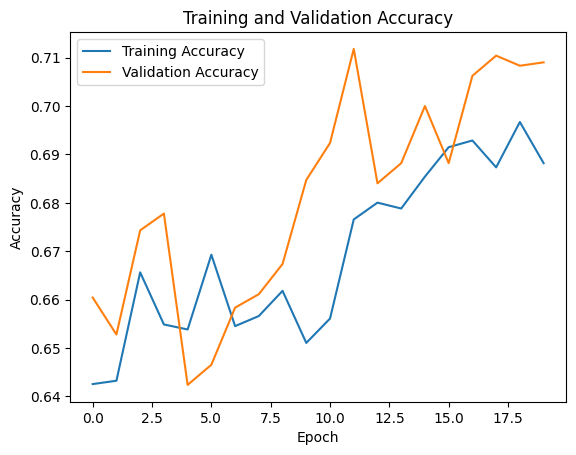

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Predict the classes of the test set
y_pred = np.argmax(model.predict(x_test), axis=-1)

45/45 [==============================] - 0s 7ms/step


In [22]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        34
           1       0.72      0.66      0.69       470
           2       0.94      0.87      0.90       107
           3       0.62      0.63      0.63       416
           4       0.88      0.91      0.89       237
           5       0.57      0.80      0.67       176

    accuracy                           0.71      1440
   macro avg       0.79      0.65      0.64      1440
weighted avg       0.72      0.71      0.70      1440



<Figure size 2000x3000 with 0 Axes>

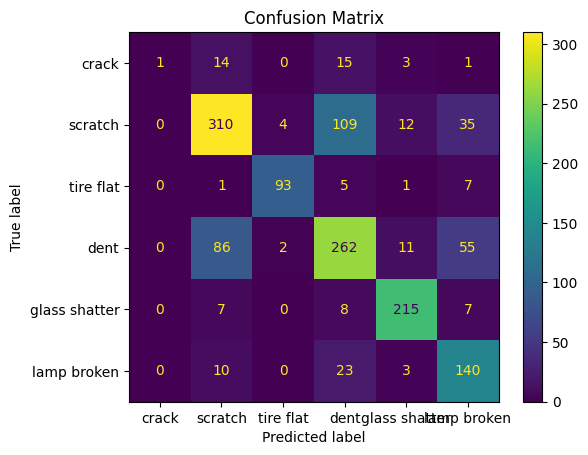

In [23]:
# Print the confusion matrix
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=class_names)
plt.title('Confusion Matrix')
plt.show()

# Testing the CNN MODEL using the test set.

45/45 [==============================] - 0s 7ms/step

 Accuracy: 70.90%
 Correct Predictions: 1021 / 1440


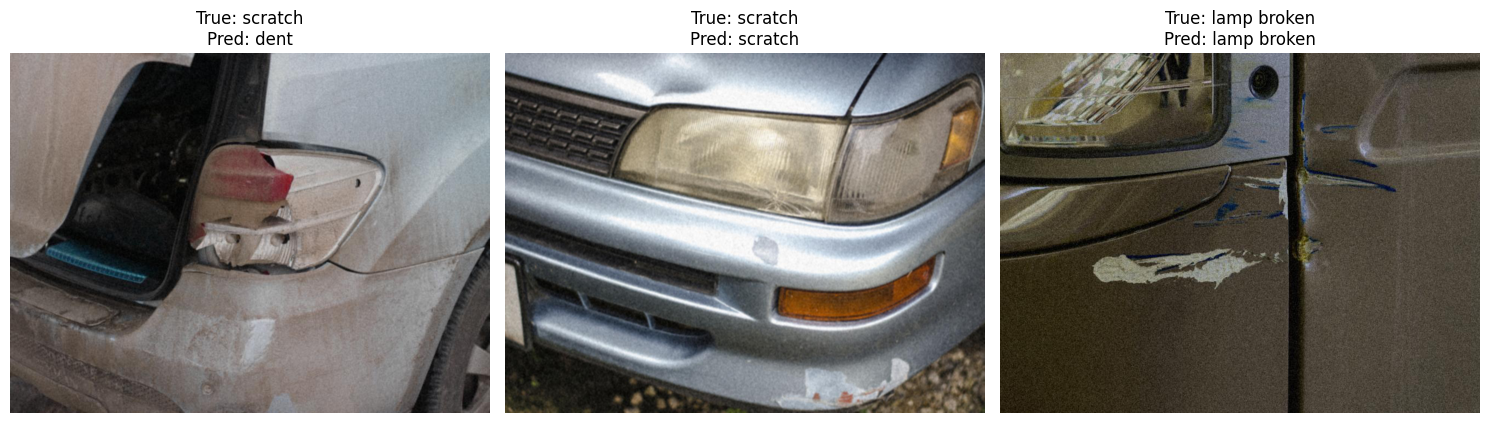

In [24]:
# Paths
image_dir = os.path.join("test", "test", "images")
test_csv_path = "test/test/test.csv"

# Load test.csv
test_data = pd.read_csv(test_csv_path)

# Label mapping
label_mapping = {
    1: 'crack',
    2: 'scratch',
    3: 'tire flat',
    4: 'dent',
    5: 'glass shatter',
    6: 'lamp broken'
}
index_to_label = {k-1: v for k, v in label_mapping.items()}

# Predict
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Handle y_test format
y_test_classes = y_test if len(y_test.shape) == 1 else np.argmax(y_test, axis=1)

# Accuracy
correct_predictions = np.sum(y_pred_classes == y_test_classes)
total_predictions = len(y_test_classes)
accuracy = correct_predictions / total_predictions * 100

print(f"\n Accuracy: {accuracy:.2f}%")
print(f" Correct Predictions: {correct_predictions} / {total_predictions}")

# Display 3 predicted images
plt.figure(figsize=(15, 5))
for i in range(min(3, len(x_test))):  # Modify the range here to display 3 images
    img_path = os.path.join(image_dir, test_data['filename'].iloc[i])
    img = plt.imread(img_path)
    plt.subplot(1, 3, i + 1)  # Display images side by side
    plt.imshow(img)
    true_label = index_to_label[y_test_classes[i]]
    pred_label = index_to_label[y_pred_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')  
plt.tight_layout()  # To ensure a tight layout without overlapping
plt.show()
